In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

## Introduction of Sobel

Sobel 算子是一種過濾器，但它帶有方向。在OpenCV-Python 中，使用Sobel 算子的函數原型如下：

 `cv2.Sobel(src, ddepth, dx, dy, dst, ksize, scale, delta, borderType) `
 
#### 必選參數：
* src - 需要處理的圖像。
* ddepth - 圖像深度。-1 表示採用與原圖像相同的深度。目標圖像深度≥原圖像深度。
* dx, dy - 求導階數，0 表示不求導。

#### 可選參數：
* ksize - Sobel 算子大小，必須為1、3、5、7。
* scale - 縮放導數的比例常數，默認情況下不伸縮。
* delta - 可選增量，會加到最終dst 中，默認情況下不額外增加。
* borderType - 判斷圖像邊界的模式。默認值為cv2.BORDER_DEFAULT。

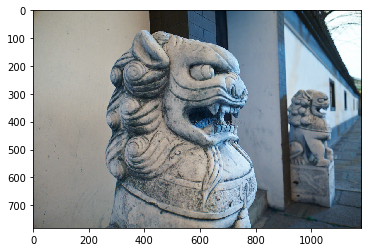

In [10]:
img = cv2.imread('lion.jpg')
plt.imshow(img)

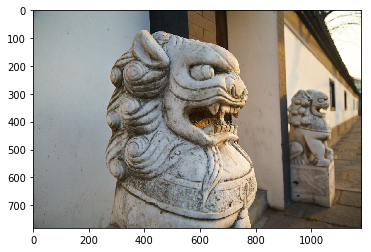

In [11]:
# Make a copy of the image
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)

Text(0.5,1,'Sobel_y')

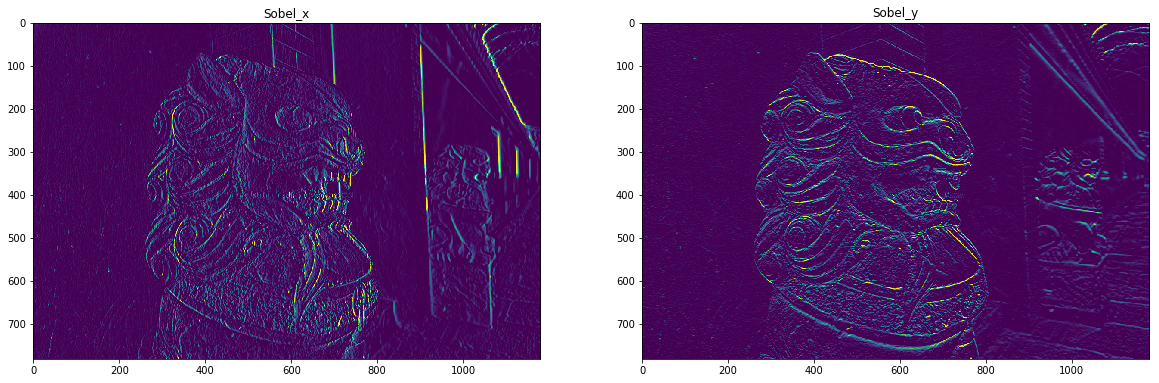

In [17]:
gray = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)
x = cv2.Sobel(gray,-1,1,0)
y = cv2.Sobel(gray,-1,0,1)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(x)
plt.title('Sobel_x')
plt.subplot(122),plt.imshow(y)
plt.title('Sobel_y')

#### 注意事項-1:
* 由於Sobel函數求導數後會有負值，還會有大於255的值，而原圖像是uint8 ，所以Sobel建立的圖像位數不夠，會有截斷。因此要使用16位有符號的數據類型，即 **cv2.CV_16S**。


Text(0.5,1,'Sobel_y')

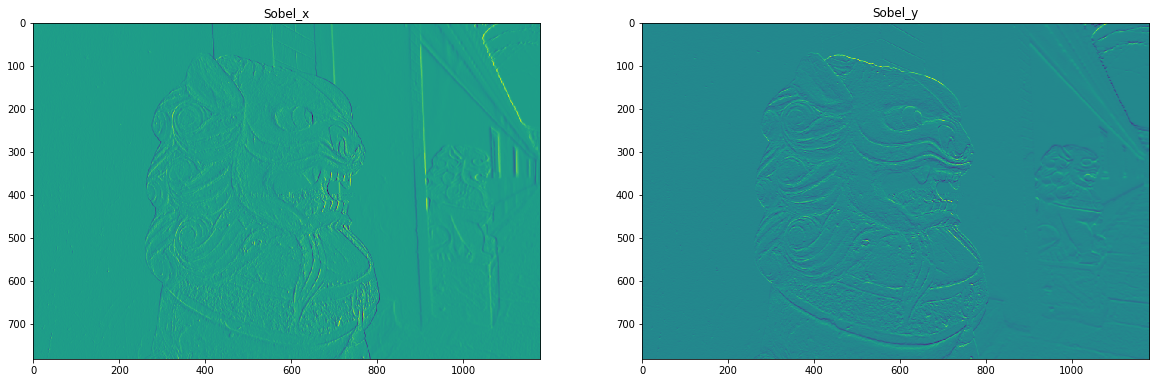

In [18]:
x = cv2.Sobel(gray,cv2.CV_16S,1,0)
y = cv2.Sobel(gray,cv2.CV_16S,0,1)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(x)
plt.title('Sobel_x')
plt.subplot(122),plt.imshow(y)
plt.title('Sobel_y')

#### 注意事項-2:
* 處理後要用`cv2.convertScaleAbs()`將其轉回原來的uint8形式，否則無法顯示圖像。`cv2.convertScaleAbs()`的原型為：

`dst = cv2.convertScaleAbs（src, dst, alpha, beta）`

其中可選參數alpha是伸縮係數，beta是加到結果上的一個值。結果返回uint8類型的圖片。

Text(0.5,1,'Sobel_y')

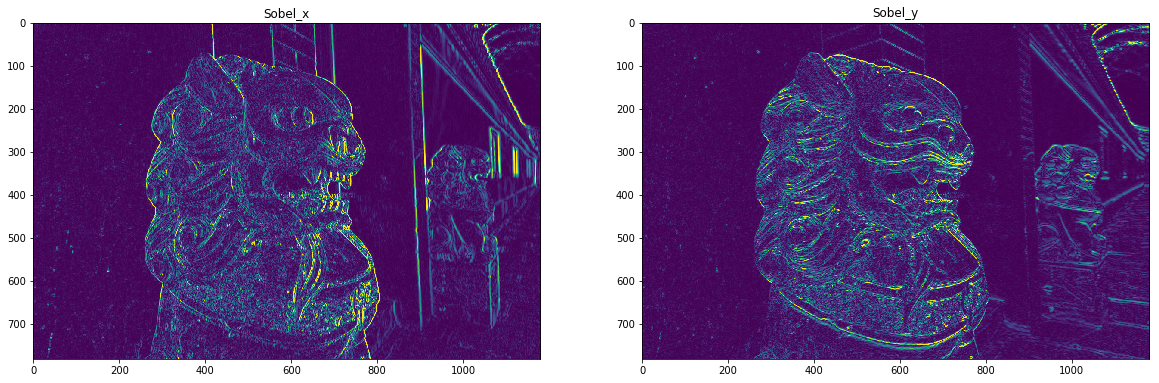

In [19]:
absX = cv2.convertScaleAbs(x)   # 轉回uint8
absY = cv2.convertScaleAbs(y)


plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(absX)
plt.title('Sobel_x')
plt.subplot(122),plt.imshow(absY)
plt.title('Sobel_y')

#### 注意事項-3:
由於Sobel算子是在兩個方向計算的，最後還需要用cv2.addWeighted(...)函數將其組合起來。其函數原型為：

`dst = cv2.addWeighted(src1, alpha, src2, beta, gamma, dst, dtype)`

其中alpha是第一幅圖片中元素的權重，beta是第二個的權重，gamma是加到最後結果上的一個值

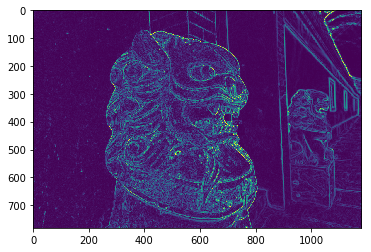

In [22]:
dst = cv2.addWeighted(absX,0.5,absY,0.5,0)
plt.imshow(dst)

Text(0.5,1,'Image after Sobel')

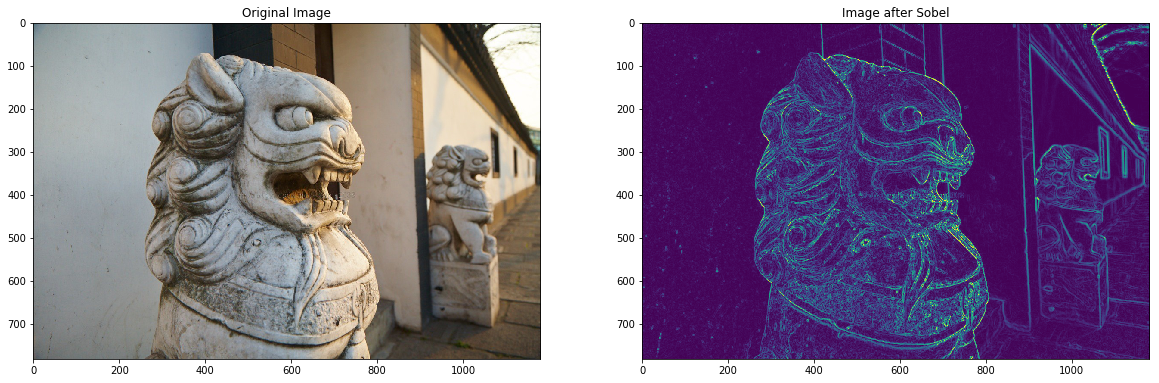

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img_copy)
plt.title('Original Image')
plt.subplot(122),plt.imshow(dst)
plt.title('Image after Sobel')

Text(0.5,1,'Image after Sobel')

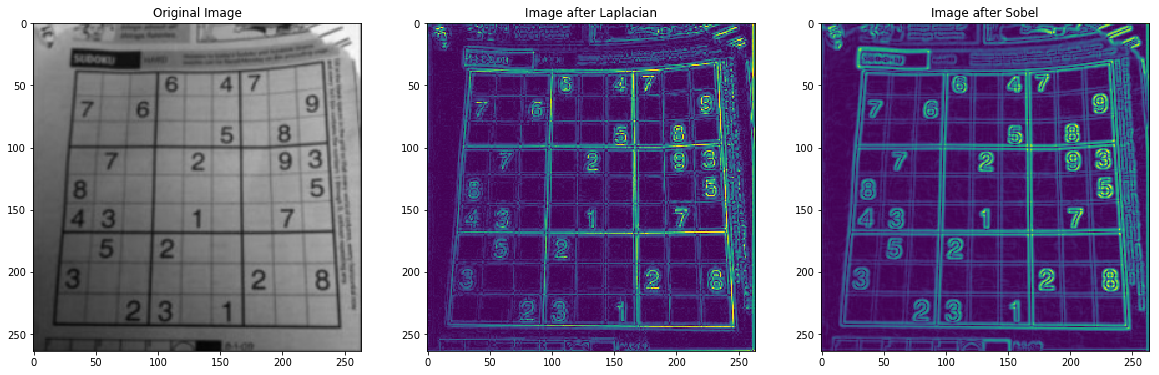

In [29]:
img = cv2.imread('2.png')
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) # Original Image

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
La = cv2.Laplacian(gray, cv2.CV_16S, ksize=3)
abs_dst_La = cv2.convertScaleAbs(La) # Laplacian Image

x = cv2.Sobel(gray, cv2.CV_16S, 1, 0)
y = cv2.Sobel(gray, cv2.CV_16S, 0, 1)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0) # Sobel Image

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img_copy)
plt.title('Original Image')
plt.subplot(132),plt.imshow(abs_dst_La)
plt.title('Image after Laplacian')
plt.subplot(133),plt.imshow(Sobel)
plt.title('Image after Sobel')

## Calculate the magnitude

Text(0.5,1,'magnitude of gradient')

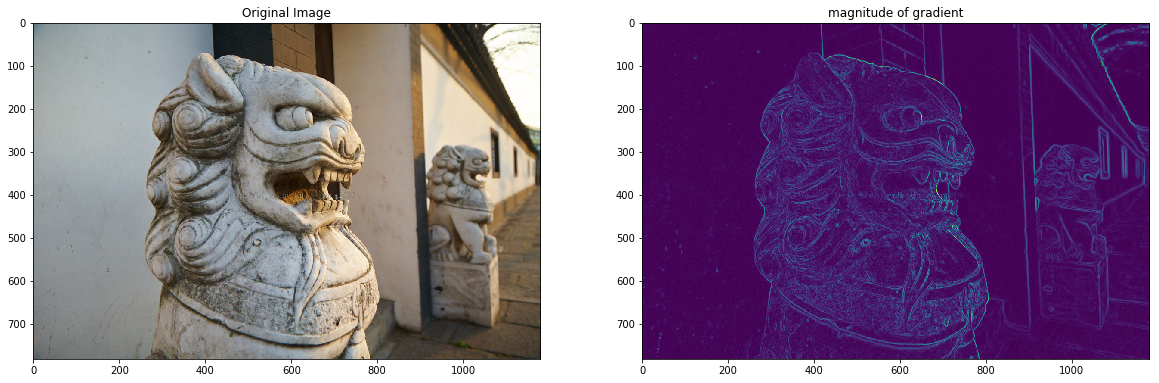

In [31]:
img = cv2.imread('lion.jpg')
# 1) Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# 2) Take the gradient in x and y separately
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
# 3) Calculate the magnitude
gradmag = np.sqrt(sobelx**2 + sobely**2)
# 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
scale_factor = np.max(gradmag)/255
gradmag = (gradmag/scale_factor).astype(np.uint8)

img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img_copy)
plt.title('Original Image')
plt.subplot(122),plt.imshow(gradmag)
plt.title('magnitude of gradient')

Text(0.5,1,'direction of gradient')

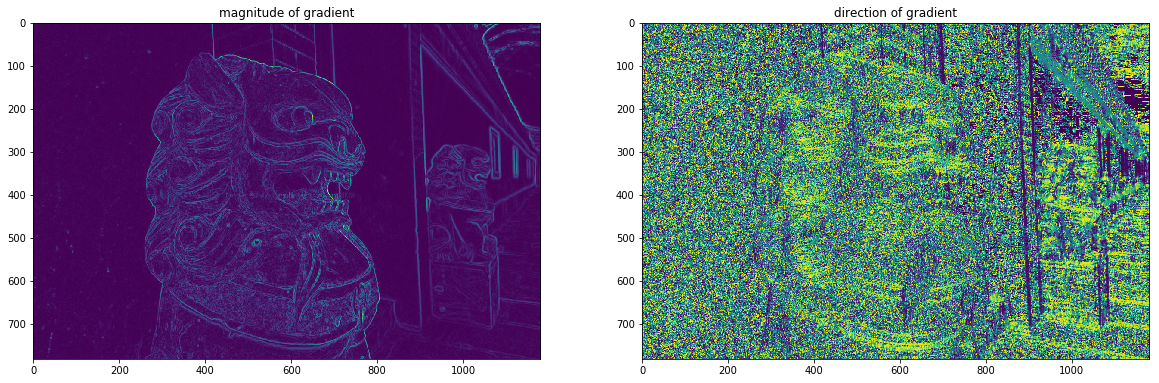

In [32]:
# 1) Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# 2) Take the gradient in x and y separately
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
# 3) Take the absolute value of the x and y gradients
abs_sobelx = np.absolute(sobelx)
abs_sobely = np.absolute(sobely)
# 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
absgraddir = np.arctan2(abs_sobely, abs_sobelx)


plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(gradmag)
plt.title('magnitude of gradient')
plt.subplot(122),plt.imshow(absgraddir)
plt.title('direction of gradient')

#### Test-Harris Responce

### Corner detection: the math
* E(u,v): 亮度 SSD of 位移 (u, v)
* u, v: 位移
* I: 亮度

<img style="float: left;" src="c1.PNG" width="60%">

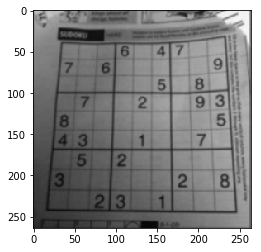

In [50]:
img1 = cv2.imread('2.png')
plt.imshow(img1)

In [51]:
img1.shape

(264, 264, 3)

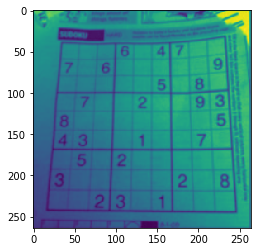

In [52]:
pli_img = Image.open('2.png').convert("L") #convert to grayscale?
img = np.array(pli_img)
plt.imshow(img)

In [53]:
img.shape

(264, 264)

In [54]:
from scipy.ndimage import filters
import numpy as np
imx = np.zeros(img.shape)
filters.gaussian_filter(img,(3,3),(0,1),imx)
imx

array([[ 0.63318982,  1.67307885,  2.12037077, ..., -8.44276463,
        -6.15396633, -2.26044606],
       [ 0.62138588,  1.63387804,  2.04477128, ..., -8.50282809,
        -6.19689757, -2.27608046],
       [ 0.59755288,  1.55663895,  1.90064218, ..., -8.60659495,
        -6.27097863, -2.30304141],
       ...,
       [ 0.06153871,  0.14620197,  0.12764308, ..., -3.91405484,
        -2.86057418, -1.05145594],
       [ 0.06941008,  0.16809573,  0.15911279, ..., -3.83522204,
        -2.80417429, -1.03089631],
       [ 0.07413288,  0.18122535,  0.17795135, ..., -3.78823538,
        -2.77062192, -1.01867886]])

In [55]:
imx.shape

(264, 264)

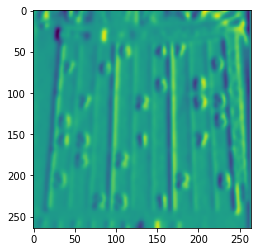

In [56]:
plt.imshow(imx)

Text(0.5,1,'Sobel_y')

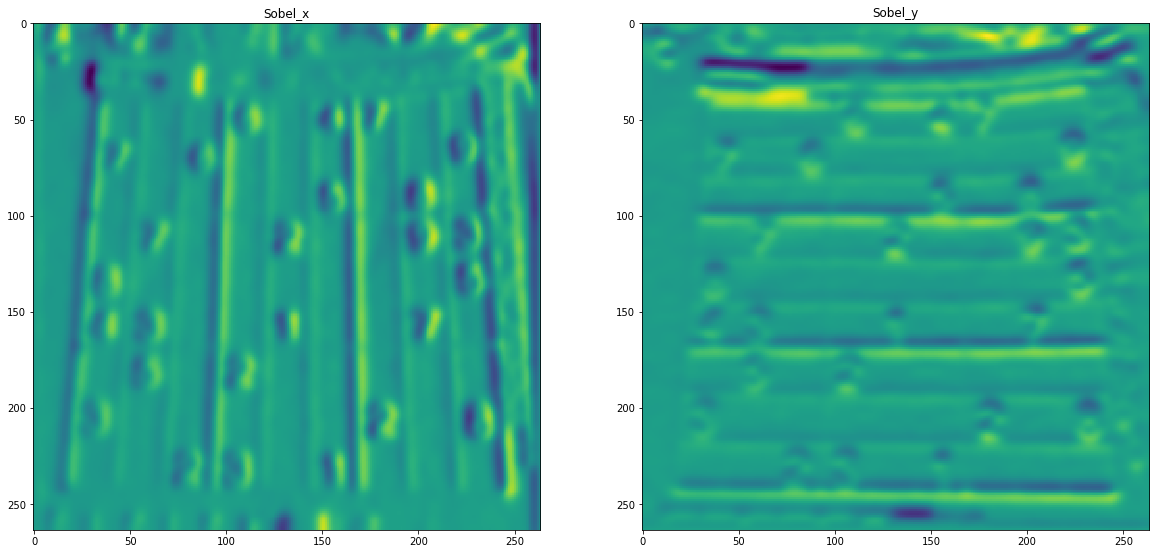

In [57]:
imy = np.zeros(img.shape)
filters.gaussian_filter(img, (3,3), (1,0), imy)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(imx)
plt.title('Sobel_x')
plt.subplot(122),plt.imshow(imy)
plt.title('Sobel_y')

<img style="float: left;" src="c2.PNG" width="60%">

In [58]:
# compute Harris corner
Wxx = filters.gaussian_filter(imx*imx, 3) #Ix^2
Wxy = filters.gaussian_filter(imx*imy, 3) #IxIy
Wyy = filters.gaussian_filter(imy*imy, 3) #Iy^2

In [59]:
Wxx.shape

(264, 264)

Text(0.5,1,'Wyy')

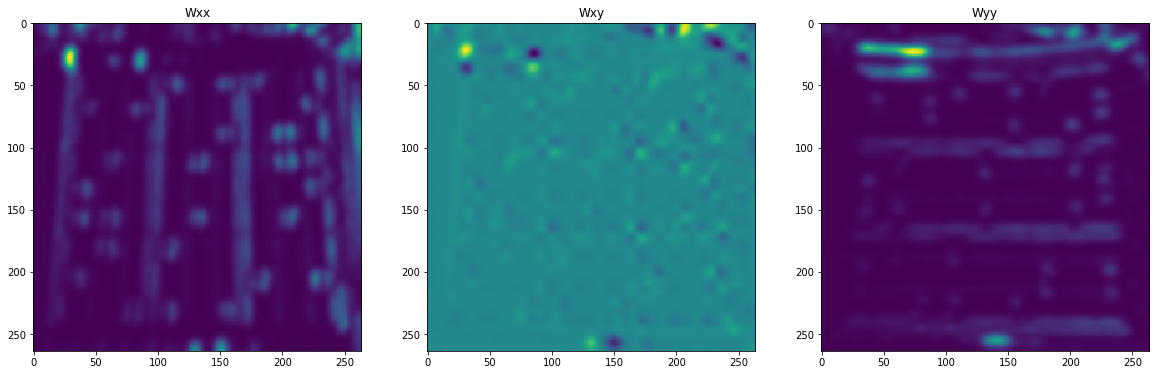

In [60]:
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(Wxx)
plt.title('Wxx')
plt.subplot(132),plt.imshow(Wxy)
plt.title('Wxy')
plt.subplot(133),plt.imshow(Wyy)
plt.title('Wyy')

<img style="float: left;" src="c3.PNG" width="60%">

<img style="float: left;" src="c4.PNG" width="60%">

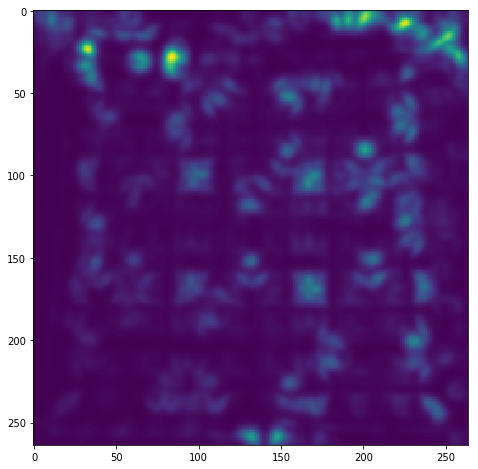

In [61]:
# Harris Operator
Wdet = Wxx * Wyy - Wxy ** 2 #determinant(H)
Wtr = Wxx + Wyy # trace(H)
f = Wdet/Wtr

plt.figure(figsize=(16,8))
plt.imshow(f)

Text(0.5,1,'k = 0.4')

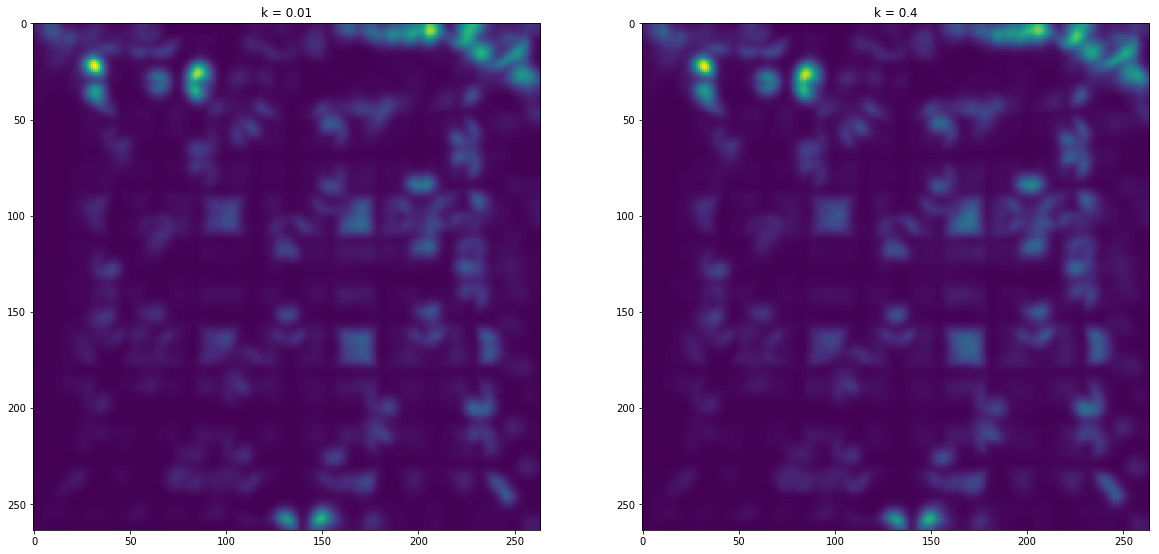

In [66]:
# Harris Operator
k = 0.01
Wdet = Wxx * Wyy - k * Wxy ** 2 #determinant(H)
Wtr = Wxx + Wyy # trace(H)
f1 = Wdet/Wtr

k = 0.4
Wdet = Wxx * Wyy - k * Wxy ** 2 #determinant(H)
Wtr = Wxx + Wyy # trace(H)
f2 = Wdet/Wtr

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(f1)
plt.title('k = 0.01')
plt.subplot(122),plt.imshow(f2)
plt.title('k = 0.4')

In [67]:
f1

array([[1.59737078, 1.72684257, 1.98987679, ..., 2.68088875, 2.58021826,
        2.52413924],
       [1.60289305, 1.73962852, 2.01628683, ..., 2.68623947, 2.58494725,
        2.5286277 ],
       [1.58993026, 1.73893045, 2.03799758, ..., 2.66188676, 2.5599172 ,
        2.50353144],
       ...,
       [0.0745741 , 0.09410964, 0.12580346, ..., 1.3345467 , 1.2872799 ,
        1.26036429],
       [0.0720073 , 0.09039337, 0.11994175, ..., 1.32708276, 1.27959508,
        1.25254097],
       [0.07046745, 0.08815137, 0.116398  , ..., 1.31433114, 1.26695078,
        1.2399655 ]])

In [68]:
f2

array([[1.51498136, 1.68482627, 1.98713634, ..., 1.94785057, 1.85545568,
        1.8078399 ],
       [1.52442175, 1.70096583, 2.01455795, ..., 1.9557327 , 1.86232624,
        1.81424579],
       [1.51837941, 1.70586758, 2.03745726, ..., 1.95130511, 1.85629192,
        1.80752199],
       ...,
       [0.07412727, 0.0925525 , 0.1206851 , ..., 0.97258336, 0.92529874,
        0.9006848 ],
       [0.07173737, 0.08925389, 0.11583685, ..., 0.96697596, 0.91951284,
        0.89478731],
       [0.07027952, 0.08722243, 0.11282291, ..., 0.95869255, 0.9113772 ,
        0.88671943]])

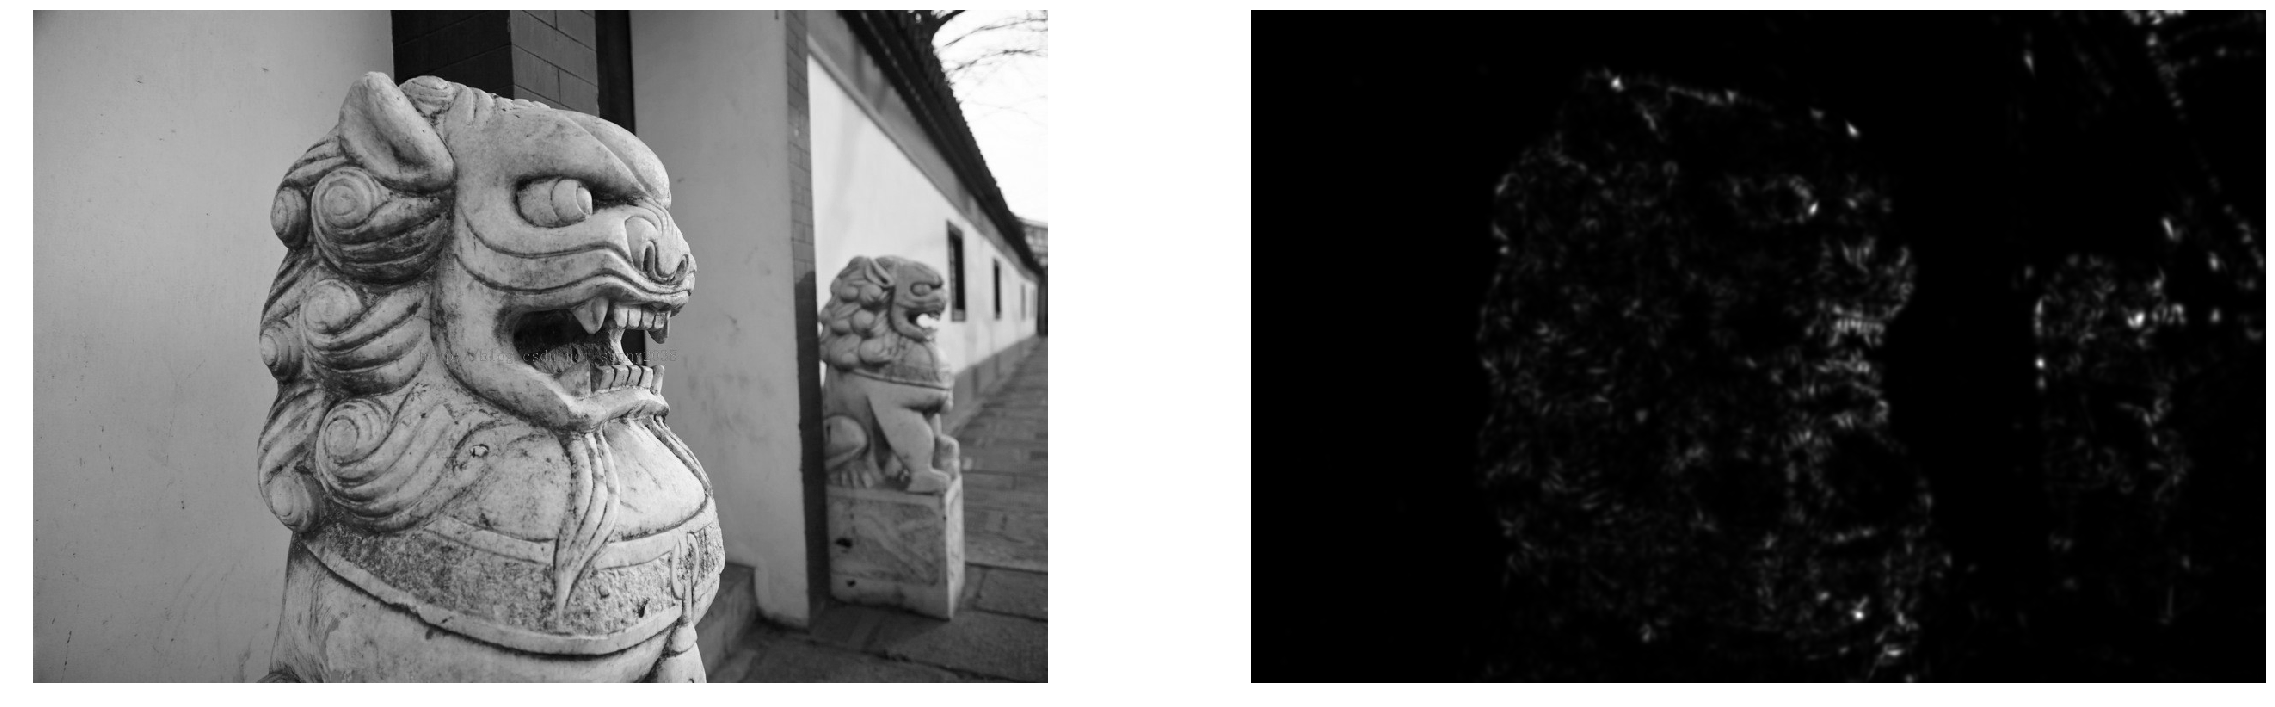

In [11]:
def compute_harris_responce(im, sigma=3):
    """
        Compute the Harris response of each pixel
        in the gray-scale image.
    """
    from scipy.ndimage import filters
    import numpy as np

    imx = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
    imy = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)
    
    # compute Harris corner
    Wxx = filters.gaussian_filter(imx*imx, sigma)
    Wxy = filters.gaussian_filter(imx*imy, sigma)
    Wyy = filters.gaussian_filter(imy*imy, sigma)

    Wdet = Wxx * Wyy - Wxy ** 2
    Wtr = Wxx + Wyy
    return Wdet/Wtr  
    
if __name__ == "__main__":
    import numpy as np
    from matplotlib import pyplot as plt
    from PIL import Image
    from scipy.ndimage import filters

    pli_img = Image.open("lion.jpg").convert("L")
    img = np.array(pli_img)
    
    plt.figure(figsize=(40,20))
    plt.subplot(121)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

    # compute and display Harris corner
    harris_response = compute_harris_responce(img)
    plt.subplot(122)
    plt.axis("off")
    plt.imshow(harris_response, cmap="gray")
    plt.show()

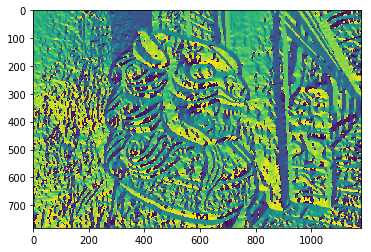

In [38]:
gradient_direction = np.arctan2(imx, imy)
plt.imshow(gradient_direction)

In [40]:
gradient_direction

array([[ 0.90040802,  1.31037105,  1.40936613, ..., -1.05987031,
        -0.45338269, -0.02459627],
       [ 0.40602061,  0.90722956,  1.1250698 , ..., -0.62676825,
        -0.24454797, -0.03926386],
       [ 0.26294099,  0.67507592,  0.91864866, ..., -0.55881282,
        -0.27298932, -0.07052781],
       ...,
       [-3.07117436, -2.9123641 , -2.71517442, ..., -1.95766465,
        -2.11693927, -2.6199339 ],
       [-3.05689668, -2.85967905, -2.60900736, ..., -1.84713876,
        -1.96152675, -2.42998616],
       [-2.93687263, -2.51406737, -2.15154027, ..., -1.67365779,
        -1.71777468, -1.96283604]])

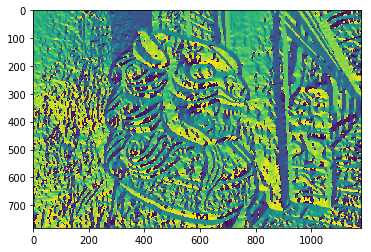

In [41]:
gradient_direction = np.rad2deg(gradient_direction)
gradient_direction += 180
plt.imshow(gradient_direction)

In [42]:
gradient_direction

array([[231.58957926, 255.07873071, 260.75073087, ..., 119.27390418,
        154.02308517, 178.59073749],
       [203.26326715, 231.98042486, 244.4617511 , ..., 144.08882462,
        165.98843345, 177.75034662],
       [195.06540903, 218.67900108, 232.63469099, ..., 147.98238391,
        164.35886409, 175.95905417],
       ...,
       [  4.03467082,  13.13382842,  24.43196495, ...,  67.8340778 ,
         58.70831438,  29.88884492],
       [  4.85272203,  16.15245964,  30.51488946, ...,  74.16674474,
         67.61279558,  40.77204862],
       [ 11.7295936 ,  35.95455032,  56.72582292, ...,  84.10647207,
         81.57876093,  67.53777916]])

In [43]:
gradient_direction.shape

(782, 1180)

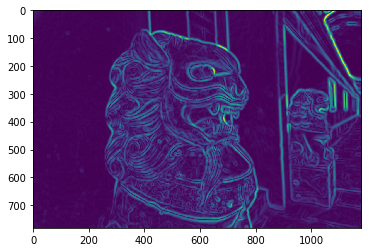

In [44]:
gradient_magnitude = np.sqrt(np.square(imx) + np.square(imy))
plt.imshow(gradient_magnitude)

In [45]:
gradient_magnitude

array([[0.262001  , 0.61967431, 0.95833587, ..., 1.17494428, 0.57632257,
        0.4811184 ],
       [0.51165139, 0.74899035, 1.03508105, ..., 1.93738557, 1.45203591,
        1.30432846],
       [0.75614689, 0.91996151, 1.14871794, ..., 2.52885891, 1.9799708 ,
        1.75431961],
       ...,
       [0.62620011, 0.62062943, 0.62295934, ..., 0.57211416, 0.40049679,
        0.23697773],
       [0.41417939, 0.41483295, 0.43195423, ..., 0.53826307, 0.3642291 ,
        0.17855877],
       [0.14742154, 0.17196862, 0.2363621 , ..., 0.51245846, 0.33615568,
        0.1247822 ]])

In [46]:
gradient_magnitude.shape

(782, 1180)

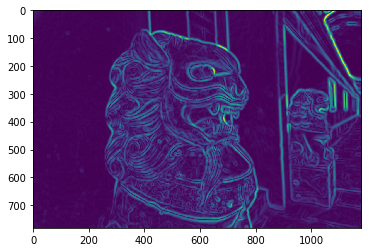

In [47]:
gradient_magnitude *= 255.0 / gradient_magnitude.max()
plt.imshow(gradient_magnitude)

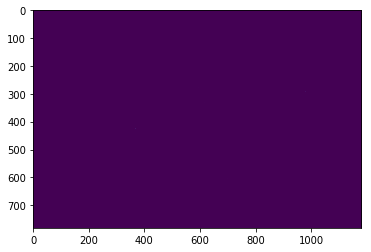

In [48]:
structure_tensor = gradient_magnitude/gradient_direction
plt.imshow(structure_tensor)